In [1]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Kernel density visualization of logged returns

In [3]:
# imports
import yfinance as yf
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as DataReader
import seaborn as sns
from datetime import datetime
from fredapi import Fred
import scipy.stats as ss
from sklearn import linear_model
import statsmodels.api as sm

In [4]:
# META
# Define the stock symbol and the time period
ticker_symbol = 'META'  # META
start_date = '2020-01-01'  # Start date (YYYY-MM-DD)
end_date = '2024-08-31'    # End date (YYYY-MM-DD)

# Fetch the stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the data
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  206.750000  209.789993  206.270004  209.779999  209.150269   
2020-01-03  207.210007  210.399994  206.949997  208.669998  208.043610   
2020-01-06  206.699997  212.779999  206.520004  212.600006  211.961823   
2020-01-07  212.820007  214.580002  211.750000  213.059998  212.420425   
2020-01-08  213.000000  216.240005  212.610001  215.220001  214.573944   
...                ...         ...         ...         ...         ...   
2024-08-26  527.599976  528.000000  514.950012  521.119995  520.623352   
2024-08-27  518.979980  524.010010  515.309998  519.099976  518.605225   
2024-08-28  517.669983  521.090027  512.450012  516.780029  516.287476   
2024-08-29  519.049988  527.200012  515.679993  518.219971  517.726074   
2024-08-30  521.349976  523.539978  515.200012  521.309998  520.813171   

              Volume  
Date          

In [5]:
pip install ta pykalman

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import SMAIndicator
from ta.volume import OnBalanceVolumeIndicator
from pykalman import KalmanFilter

# Define the stock symbol and the time period
ticker_symbol = 'META'  # META
start_date = '2019-01-01'  # Start date (YYYY-MM-DD)
end_date = '2024-08-31'    # End date (YYYY-MM-DD)

# Fetch the stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Ensure the dataset is not empty
if stock_data.empty:
    raise ValueError("No data fetched. Please check the ticker symbol and date range.")

# Calculate RSI
stock_data['RSI'] = RSIIndicator(close=stock_data['Close'], window=14).rsi()

# Calculate Bollinger Band-based Volatility
bb_indicator = BollingerBands(close=stock_data['Close'], window=20, window_dev=2)
stock_data['Volatility'] = bb_indicator.bollinger_hband() - bb_indicator.bollinger_lband()

# Calculate Simple Moving Averages (SMA20 and SMA50)
stock_data['SMA20'] = SMAIndicator(close=stock_data['Close'], window=20).sma_indicator()
stock_data['SMA50'] = SMAIndicator(close=stock_data['Close'], window=50).sma_indicator()

# Calculate On-Balance Volume (OBV)
stock_data['OBV'] = OnBalanceVolumeIndicator(close=stock_data['Close'], volume=stock_data['Volume']).on_balance_volume()

# Function to apply Kalman Filter
def apply_kalman_filter(data):
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    kf = kf.em(data.values.reshape(-1, 1), n_iter=10)
    state_means, _ = kf.filter(data.values.reshape(-1, 1))
    return state_means.flatten()

# Apply Kalman Filter to the 'Close' column
stock_data['Kalman'] = apply_kalman_filter(stock_data['Close'])

# Calculate log returns
stock_data['log_return'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

# Fill any NaN values generated in the calculations
stock_data.fillna(method='ffill', inplace=True)
stock_data.dropna(inplace=True)

# Save the resulting dataset as a CSV file
output_file = 'META_with_technical_indicators.csv'
stock_data.to_csv(output_file)

print(f"Technical indicators added and dataset saved as '{output_file}'.")


[*********************100%***********************]  1 of 1 completed


Technical indicators added and dataset saved as 'META_with_technical_indicators.csv'.


[*********************100%***********************]  1 of 1 completed

sample mean (average daily log returns): 0.07777820966233326%
sample standard deviation of log returns: 2.928802467044888%


<Figure size 1200x600 with 0 Axes>

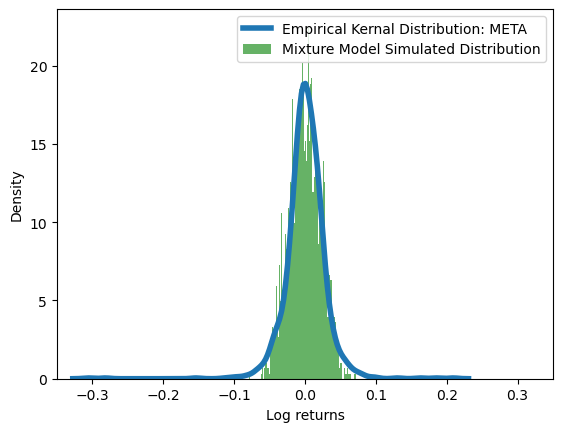

In [7]:
start_date = datetime(2020,1,1)
end_date = datetime(2024,8,31)

stock_symbol = "META"
stocks = yf.download(stock_symbol,start_date ,end_date)

# Calculate log returns from Adjusted Close
stocks['Log Returns'] = np.log(stocks['Adj Close'] / stocks['Adj Close'].shift(1))
X = stocks['Log Returns'].dropna()  # Drop NaN values
mu = np.mean(X) * 100
se = np.std(X) * 100
print(f"sample mean (average daily log returns): {mu}%")
print(f"sample standard deviation of log returns: {se}%")

# Given parameters
mu_1 = 0.0005
sigma1 = 0.022
T = 2000

# Generate the data for r
r = mu_1 + sigma1 * np.random.normal(0, 1, T)

# Plotting the histogram of r
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4)
plt.hist(r, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
plt.xlabel("Log returns")
plt.ylabel("Density")
plt.xlim(-0.35, 0.35)
ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 'Mixture Model Simulated Distribution'])

In [8]:
# Google
# Define the stock symbol and the time period
ticker_symbol = 'GOOG'  # GOOGLE
start_date = '2020-01-01'  # Start date (YYYY-MM-DD)
end_date = '2024-08-31'    # End date (YYYY-MM-DD)

# Fetch the stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the data
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   67.077499   68.406998   67.077499   68.368500   68.123726   
2020-01-03   67.392998   68.625000   67.277199   68.032997   67.789421   
2020-01-06   67.500000   69.824997   67.500000   69.710503   69.460922   
2020-01-07   69.897003   70.149498   69.518997   69.667000   69.417580   
2020-01-08   69.603996   70.579002   69.542000   70.216003   69.964615   
...                ...         ...         ...         ...         ...   
2024-08-26  168.154999  169.380005  166.320007  167.929993  167.519180   
2024-08-27  167.610001  168.244995  166.160004  166.380005  165.972992   
2024-08-28  166.779999  167.389999  163.279999  164.500000  164.097565   
2024-08-29  166.059998  167.630005  161.981995  163.399994  163.000259   
2024-08-30  164.220001  165.279999  163.410004  165.110001  164.706085   

              Volume  
Date          

[*********************100%***********************]  1 of 1 completed

sample mean (average daily log returns): 0.07526317420424866%
sample standard deviation of log returns: 2.0595989262254477%


<Figure size 1200x600 with 0 Axes>

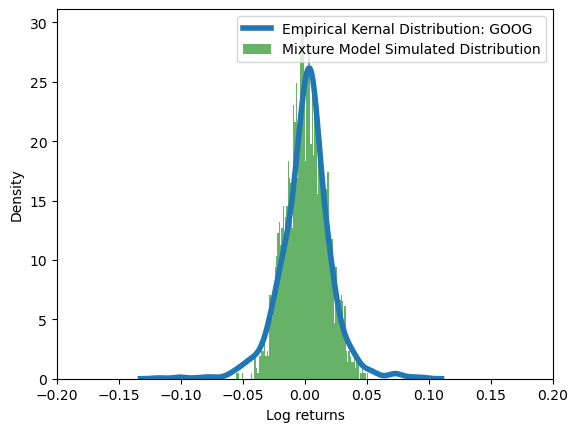

In [9]:
start_date = datetime(2020,1,1)
end_date = datetime(2024,8,31)

stock_symbol = "GOOG"
stocks = yf.download(stock_symbol,start_date ,end_date)

# Calculate log returns from Adjusted Close
stocks['Log Returns'] = np.log(stocks['Adj Close'] / stocks['Adj Close'].shift(1))
X = stocks['Log Returns'].dropna()  # Drop NaN values
mu = np.mean(X) * 100
se = np.std(X) * 100
print(f"sample mean (average daily log returns): {mu}%")
print(f"sample standard deviation of log returns: {se}%")

# Given parameters
mu_1 = 0.00035
sigma1 = 0.016
T = 2000

# Generate the data for r
r = mu_1 + sigma1 * np.random.normal(0, 1, T)

# Plotting the histogram of r
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4)
plt.hist(r, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
plt.xlabel("Log returns")
plt.ylabel("Density")
plt.xlim(-0.2, 0.2)
ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 'Mixture Model Simulated Distribution'])

In [10]:
# SNAP
# Define the stock symbol and the time period
ticker_symbol = 'SNAP'  # SNAP
start_date = '2020-01-01'  # Start date (YYYY-MM-DD)
end_date = '2024-08-31'    # End date (YYYY-MM-DD)

# Fetch the stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the data
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  16.620001  16.950001  16.459999  16.780001  16.780001  26062600
2020-01-03  16.430000  17.100000  16.350000  16.750000  16.750000  19761500
2020-01-06  16.650000  16.790001  16.410000  16.780001  16.780001  15952600
2020-01-07  16.870001  17.065001  16.549999  17.030001  17.030001  21146400
2020-01-08  16.980000  17.010000  16.650000  16.670000  16.670000  15600900
...               ...        ...        ...        ...        ...       ...
2024-08-26   9.400000   9.620000   9.384000   9.420000   9.420000  21843400
2024-08-27   9.280000   9.570000   9.280000   9.500000   9.500000  17453900
2024-08-28   9.380000   9.440000   9.130000   9.180000   9.180000  17945100
2024-08-29   9.290000   9.440000   9.160000   9.220000   9.220000  19312600
2024-08-30   9.340000   9.420000   9.180000   9.340000   9.340000  17230600

[1174 rows 

[*********************100%***********************]  1 of 1 completed

sample mean (average daily log returns): -0.04994726968301328%
sample standard deviation of log returns: 5.255023402517026%


<Figure size 1200x600 with 0 Axes>

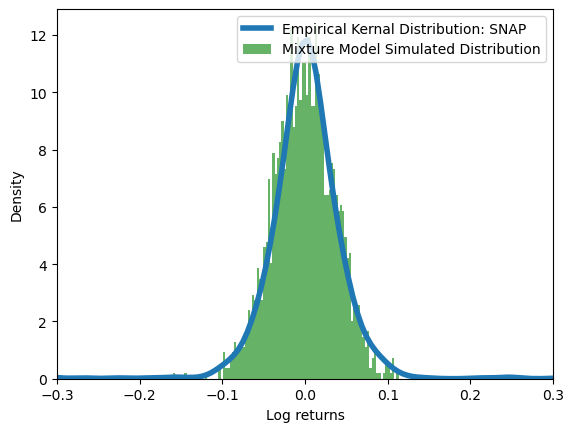

In [11]:
start_date = datetime(2020,1,1)
end_date = datetime(2024,8,31)

stock_symbol = "SNAP"
stocks = yf.download(stock_symbol,start_date ,end_date)

# Calculate log returns from Adjusted Close
stocks['Log Returns'] = np.log(stocks['Adj Close'] / stocks['Adj Close'].shift(1))
X = stocks['Log Returns'].dropna()  # Drop NaN values
mu = np.mean(X) * 100
se = np.std(X) * 100
print(f"sample mean (average daily log returns): {mu}%")
print(f"sample standard deviation of log returns: {se}%")

# Given parameters
mu_1 = 0.0001
sigma1 = 0.036
T = 2000

# Generate the data for r
r = mu_1 + sigma1 * np.random.normal(0, 1, T)

# Plotting the histogram of r
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4)
plt.hist(r, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
plt.xlabel("Log returns")
plt.ylabel("Density")
plt.xlim(-0.3, 0.3)
ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 'Mixture Model Simulated Distribution'])

In [12]:
# APPLE
# Define the stock symbol and the time period
ticker_symbol = 'AAPL'  # APPLE
start_date = '2020-01-01'  # Start date (YYYY-MM-DD)
end_date = '2024-08-31'    # End date (YYYY-MM-DD)

# Fetch the stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the data
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.796021   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.088303   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.662720   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.320976   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.484352   
...                ...         ...         ...         ...         ...   
2024-08-26  226.759995  227.279999  223.889999  227.179993  226.930328   
2024-08-27  226.000000  228.850006  224.889999  228.029999  227.779388   
2024-08-28  227.919998  229.860001  225.679993  226.490005  226.241089   
2024-08-29  230.100006  232.919998  228.880005  229.789993  229.537460   
2024-08-30  230.190002  230.399994  227.479996  229.000000  228.748337   

               Volume  
Date         

[*********************100%***********************]  1 of 1 completed

sample mean (average daily log returns): 0.09760964560274508%
sample standard deviation of log returns: 2.038317351391555%


<Figure size 1200x600 with 0 Axes>

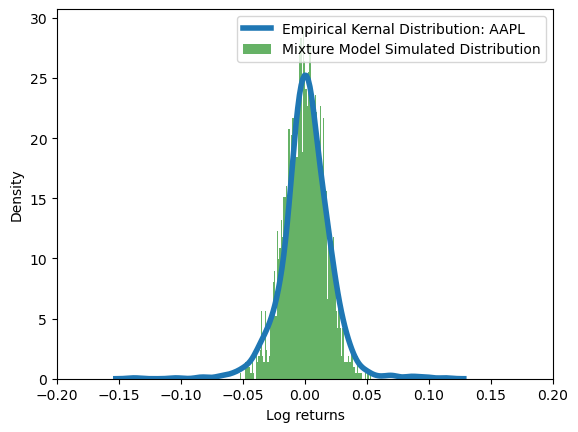

In [13]:
start_date = datetime(2020,1,1)
end_date = datetime(2024,8,31)

stock_symbol = "AAPL"
stocks = yf.download(stock_symbol,start_date ,end_date)

# Calculate log returns from Adjusted Close
stocks['Log Returns'] = np.log(stocks['Adj Close'] / stocks['Adj Close'].shift(1))
X = stocks['Log Returns'].dropna()  # Drop NaN values
mu = np.mean(X) * 100
se = np.std(X) * 100
print(f"sample mean (average daily log returns): {mu}%")
print(f"sample standard deviation of log returns: {se}%")

# Given parameters
mu_1 = 0.00015
sigma1 = 0.016
T = 2000

# Generate the data for r
r = mu_1 + sigma1 * np.random.normal(0, 1, T)

# Plotting the histogram of r
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4)
plt.hist(r, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
plt.xlabel("Log returns")
plt.ylabel("Density")
plt.xlim(-0.2, 0.2)
ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 'Mixture Model Simulated Distribution'])

In [14]:
# 1. FAMA-FRENCH 5 FACTORS
# Get the Fama French 5 factor model (monthly data)
column_names=['date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
data_ff5 = pd.read_csv(
    'F-F_Research_Data_5_Factors_2x3_daily.csv',
    usecols=range(7),  # Only read the first 7 columns
    names=column_names,
    header=None,
    skiprows=4)
data_ff5['date'] = data_ff5['date'].astype(str).str[0:4]+'-'\
                    +data_ff5['date'].astype(str).str[4:6]+'-'\
                    +data_ff5['date'].astype(str).str[6:8]
                    
data_ff5['date'] = pd.to_datetime(data_ff5['date'], format='%Y-%m-%d')
data_ff5['date'] = data_ff5['date'].dt.date
df_ffs = data_ff5.set_index('date')

print(df_ffs.head())
print(df_ffs.shape)

            Mkt-RF   SMB   HML   RMW   CMA     RF
date                                             
1963-07-01   -0.67  0.02 -0.35  0.03  0.13  0.012
1963-07-02    0.79 -0.28  0.28 -0.08 -0.21  0.012
1963-07-03    0.63 -0.18 -0.10  0.13 -0.25  0.012
1963-07-05    0.40  0.09 -0.28  0.07 -0.30  0.012
1963-07-08   -0.63  0.07 -0.20 -0.27  0.06  0.012
(15417, 6)


In [15]:
# 2. ADS INDEX
data_ads = pd.read_excel('ADS_Index_Most_Current_Vintage.xlsx')
# manually replace : into -
df_ads = data_ads.set_index('date')
df_ads.index = pd.to_datetime(df_ads.index, format='%Y:%m:%d')

In [16]:
# 3. FRED DATA
fred = Fred(api_key='54dfdd8235a4e8e857eb4e5e4e77aed4')
varList = ['T10Y3M', 'DGS10', 'OBMMIJUMBO30YF',  # term premium 10yr-3mon, 30 yr mortgage jumbo loan
           'DEXUSEU', 'DEXJPUS', 'DEXUSUK', # spot exchange rates to EUR, JPY, GBP 
           'CBBTCUSD', 'CBETHUSD',  # cryptocurrencies
               'T10YIE', 'DCOILBRENTEU', # breakeven inflation + brent oil price 
               'VIXCLS', # implied volatilities
               'DAAA', 'DBAA', # corporate bond yield
              'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2','BAMLH0A0HYM2EY', 'DGS1', 'DCOILWTICO', 
                              'DHHNGSP', 'EMVELECTGOVRN', 'ECIWAG'] 

SP500 = fred.get_series('SP500')
SP500.name = 'SP500'
df_fred = SP500

# merge data series
for i in range(0, len(varList)):
    data = fred.get_series(varList[i])
    data.name = varList[i]
    df_fred = pd.merge(df_fred, data, left_index=True, right_index=True, how='outer')

In [17]:
print("df_ffs index:", df_ffs.index)
print("df_ads index:", df_ads.index)
print("df_fred index:", df_fred.index)

df_ffs index: Index([1963-07-01, 1963-07-02, 1963-07-03, 1963-07-05, 1963-07-08, 1963-07-09,
       1963-07-10, 1963-07-11, 1963-07-12, 1963-07-15,
       ...
       2024-09-17, 2024-09-18, 2024-09-19, 2024-09-20, 2024-09-23, 2024-09-24,
       2024-09-25, 2024-09-26, 2024-09-27, 2024-09-30],
      dtype='object', name='date', length=15417)
df_ads index: DatetimeIndex(['1960-03-01', '1960-03-02', '1960-03-03', '1960-03-04',
               '1960-03-05', '1960-03-06', '1960-03-07', '1960-03-08',
               '1960-03-09', '1960-03-10',
               ...
               '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
               '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14',
               '2024-11-15', '2024-11-16'],
              dtype='datetime64[ns]', name='date', length=23637, freq=None)
df_fred index: DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962

In [18]:
print(df_ffs.shape)
print(df_ads.shape)
print(df_fred.shape)

(15417, 6)
(23637, 1)
(17634, 23)


In [19]:
print(df_ffs.index.min())  # Minimum date in df_ffs
print(df_ffs.index.max())  # Maximum date in df_ffs

1963-07-01
2024-09-30


In [20]:
start_date = datetime(2019, 1, 1)  # Start date for interpolation using 2019 data
end_date = datetime(2024, 8, 31)

# Convert index to datetime
df_ffs.index = pd.to_datetime(df_ffs.index)

# Apply mask for the date range (2019-2024) for interpolation
mask = (df_ffs.index >= start_date) & (df_ffs.index <= end_date)
df_ffs = df_ffs.loc[mask]

# Merge datasets
DATA_part1 = pd.merge(df_ffs, df_ads, left_index=True, right_index=True)
DATA = pd.merge(DATA_part1, df_fred, left_index=True, right_index=True)

# Perform polynomial interpolation for missing values
DATA['EMVELECTGOVRN_interp'] = DATA['EMVELECTGOVRN'].interpolate(method='polynomial', order=2)
DATA['ECIWAG_interp'] = DATA['ECIWAG'].interpolate(method='polynomial', order=2)

# Drop the 'ECIWAG' and 'EMVELECTGOVRN' columns
DATA = DATA.drop(['ECIWAG', 'EMVELECTGOVRN'], axis=1)

# Reset index and rename to 'Date'
DATA.reset_index(inplace=True)
DATA = DATA.rename(columns={'index': 'Date'})  # Ensure 'Date' column is correctly renamed

print(DATA.columns)  # Check if 'Date' is now a column

# Export the modified dataset to CSV
DATA.to_csv('INFO6105_FeatureMart_interpolated_2019.csv', index=True)  # Save without the index

Index(['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ADS_Index',
       'SP500', 'T10Y3M', 'DGS10', 'OBMMIJUMBO30YF', 'DEXUSEU', 'DEXJPUS',
       'DEXUSUK', 'CBBTCUSD', 'CBETHUSD', 'T10YIE', 'DCOILBRENTEU', 'VIXCLS',
       'DAAA', 'DBAA', 'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2', 'BAMLH0A0HYM2EY',
       'DGS1', 'DCOILWTICO', 'DHHNGSP', 'EMVELECTGOVRN_interp',
       'ECIWAG_interp'],
      dtype='object')


In [21]:
import pandas as pd

# Step 1: Load the FeatureMart dataset
featuremart_data = pd.read_csv('INFO6105_FeatureMart_interpolated_2019.csv', parse_dates=['Date'])
featuremart_data.set_index('Date', inplace=True)

# Step 2: Load the META stock data with technical indicators
meta_data = pd.read_csv('META_with_technical_indicators.csv', parse_dates=['Date'])
meta_data.set_index('Date', inplace=True)

# Step 3: Merge the two datasets on the 'Date' column
# Make sure the date columns are of the same type and use an inner join to merge
merged_data = pd.merge(featuremart_data, meta_data[['RSI', 'Volatility', 'SMA20', 'SMA50', 'OBV', 'Kalman', 'log_return']],
                       left_index=True, right_index=True, how='inner')

# Step 4: Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in merged_data.columns:
    merged_data = merged_data.drop(columns=['Unnamed: 0'])

# Step 5: Save the merged dataset to a new CSV file
merged_data.reset_index(inplace=True)
merged_data.to_csv('INFO6105_FeatureMart_with_meta_indicators.csv', index=False)

print("Merged dataset with technical indicators saved as 'INFO6105_FeatureMart_with_meta_indicators.csv'.")

Merged dataset with technical indicators saved as 'INFO6105_FeatureMart_with_meta_indicators.csv'.


In [22]:
# Feature Selection

In [23]:
print(merged_data.head())
print(merged_data.columns)

        Date  Mkt-RF   SMB   HML   RMW   CMA     RF  ADS_Index    SP500  \
0 2019-03-14   -0.10 -0.38  0.31 -0.15 -0.10  0.009  -0.367425  2808.48   
1 2019-03-15    0.48 -0.24 -0.25 -0.03 -0.19  0.009  -0.363209  2822.48   
2 2019-03-18    0.46  0.23  0.45 -0.08 -0.07  0.009  -0.358272  2832.94   
3 2019-03-19   -0.09 -0.47 -0.91  0.01 -0.05  0.009  -0.358962  2832.57   
4 2019-03-20   -0.39 -0.23 -1.04 -0.17 -0.23  0.009  -0.360791  2824.23   

   T10Y3M  ...  DHHNGSP  EMVELECTGOVRN_interp  ECIWAG_interp        RSI  \
0    0.18  ...     2.95              1.317808            NaN  59.853341   
1    0.14  ...     2.95              1.299110            NaN  51.454295   
2    0.16  ...     2.90              1.239610            NaN  42.924012   
3    0.15  ...     2.92              1.221288            NaN  44.888340   
4    0.06  ...     2.86              1.204119            NaN  51.245656   

   Volatility       SMA20       SMA50        OBV      Kalman  log_return  
0   17.461011  166.2959

In [24]:
import pandas as pd
from datetime import datetime

# Load the data, with the 'Date' column already set as the index
merged_data = pd.read_csv('INFO6105_FeatureMart_with_meta_indicators.csv', index_col=[0], parse_dates=True)

# Display summary statistics
print(merged_data.describe())

# Check if 'Date' is indeed the index
print(merged_data.head())  # This will show the first few rows to confirm the index

# Filter the data to include only rows where the index (Date) is greater than or equal to start_date
start_date = datetime(2020, 1, 1)

# Use the index (which is 'Date') for filtering
merged_data = merged_data[merged_data.index >= start_date]

# Check the first few rows and column names to confirm the filtering
print(merged_data.head())
print(merged_data.columns)

            Mkt-RF          SMB          HML          RMW          CMA  \
count  1377.000000  1377.000000  1377.000000  1377.000000  1377.000000   
mean      0.054604    -0.010610    -0.001024     0.028402     0.002840   
std       1.335829     0.800036     1.100418     0.623329     0.550605   
min     -12.000000    -4.550000    -4.970000    -2.180000    -2.740000   
25%      -0.520000    -0.500000    -0.610000    -0.360000    -0.300000   
50%       0.070000    -0.030000    -0.040000     0.020000    -0.020000   
75%       0.730000     0.430000     0.590000     0.400000     0.320000   
max       9.340000     5.720000     6.730000     4.210000     2.520000   

                RF    ADS_Index        SP500       T10Y3M        DGS10  ...  \
count  1377.000000  1377.000000  1377.000000  1368.000000  1368.000000  ...   
mean      0.008585    -0.269682  3972.511924     0.121133     2.501184  ...   
std       0.008477     3.853005   741.854724     1.110217     1.300104  ...   
min       0.00000

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as ss

# Figure configuration
plt.rcParams['figure.figsize'] = (16, 6)

# Define date range
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 8, 31)

# Load the dataset
DATA = pd.read_csv('INFO6105_FeatureMart_with_meta_indicators.csv', index_col=[-1])
DATA['Date'] = pd.to_datetime(DATA['Date'])

# Download the stock data (META)
STOCK = yf.download('META', start_date, end_date)

# Prepare the independent variables (X)
X = DATA.set_index('Date').fillna(method='bfill')

# Prepare the dependent variable (y) as log returns
y = np.diff(np.log(STOCK['Adj Close'].values))
y = np.append(y[0], y)  # Add the first value to maintain the same length
y = pd.Series(y, index=STOCK.index)  # Ensure y has the same index as STOCK

# Add constant to X for OLS
X = sm.add_constant(X)
X = X.fillna(0)

# Ensure X and y share the same index
X = X.loc[y.index]  # Align X and y to have the same index

# Step 1: OLS regression to select features based on p-value (hard thresholding)
benchmark_prep = sm.OLS(y, X).fit()
benchmark_prep.summary()

# Select features based on the threshold |t| >= 1.96 (p-value < 0.05)
benchmark_select = X.columns[np.abs(benchmark_prep.tvalues) >= 1.96]
x = X[benchmark_select]

# Step 2: Regress y on the selected features
benchmark = sm.OLS(y, x).fit()
print(benchmark.summary())

# Predict and compute correlation between predicted and actual values
y_hat_benchmark1 = benchmark.predict(x)
corr_benchmark1 = ss.pearsonr(y_hat_benchmark1, y)[0]
print('Benchmark: corr (Y, Y_pred) = ' + str(corr_benchmark1))

# Print the number of features selected
print('Hard Thresholding selected ' + str(len(benchmark_select)) + ' features: ', benchmark_select.values)

[*********************100%***********************]  1 of 1 completed

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.488
Model:                            OLS   Adj. R-squared (uncentered):              0.483
Method:                 Least Squares   F-statistic:                              100.8
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                   1.85e-160
Time:                        16:41:08   Log-Likelihood:                          2872.1
No. Observations:                1174   AIC:                                     -5722.
Df Residuals:                    1163   BIC:                                     -5666.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
# Ridge regression
# Motivation: the model sets the objective function to be the 
# sum of squared residuals from OLS + penalty function 
# that penalizes squared values of beta. A minimization process squeezes 
# the small beta values close to 0. 
# a represents the obj function's sensitivity to the penalty term   
# Steo 1. run Ridge Regression and obtain coefficients
# Step 2. remove features with coefficients close to 0 and run OLS 
a = 0.5
model2_prep = linear_model.Ridge(alpha=a, fit_intercept=False).fit(X, y)
model2_select = X.columns[np.abs(model2_prep.coef_)>=0.001]
x = X[model2_select]
model2 = sm.OLS(y,x).fit()
print(model2.summary())
y_pred_model2 = model2.predict(x)
corr_model2 = ss.pearsonr(y_pred_model2, y)[0]
print('model 2 Ridge Regression: corr (Y, Y_pred) = '+str(corr_model2))
print('Ridge Regression selected ' +str(len(model2_select)) +' features: ', model2_select.values)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     68.44
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          1.46e-167
Time:                        16:41:08   Log-Likelihood:                 2905.6
No. Observations:                1174   AIC:                            -5773.
Df Residuals:                    1155   BIC:                            -5677.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0402      0.040      1.

/Users/natnichalerd/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.11377e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [27]:
# LASSO
a = 0.5
model3_prep = linear_model.Lasso(alpha=a, fit_intercept=False).fit(X, y)
model3_select = X.columns[np.abs(model3_prep.coef_)!=0.0]
x = X[model3_select]
model3 = sm.OLS(y,x).fit()
print(model3.summary())
y_pred_model3 = model3.predict(x)
corr_model3 = ss.pearsonr(y_pred_model3, y)[0]
print('model 3 LASSO: corr (Y, Y_pred) = '+str(corr_model3))
print('LASSO selected ' +str(len(model3_select)) +' features: ', model3_select.values)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              2.493
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                      0.0586
Time:                        16:41:08   Log-Likelihood:                          2482.9
No. Observations:                1174   AIC:                                     -4960.
Df Residuals:                    1171   BIC:                                     -4945.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
# Elastic net
a = 0.5
model4_prep = linear_model.ElasticNet(alpha=a, fit_intercept=False).fit(X, y)
model4_select = X.columns[np.abs(model4_prep.coef_)!=0.0]
x = X[model4_select]
model4 = sm.OLS(y,x).fit()
print(model4.summary())
y_pred_model4 = model4.predict(x)
corr_model4 = ss.pearsonr(y_pred_model4, y)[0]
print('model 4 Elastic Net: corr (Y, Y_pred) = '+str(corr_model3))
print('ElasticNet selected ' +str(len(model4_select)) +' features: ', model4_select.values)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              2.493
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                      0.0586
Time:                        16:41:08   Log-Likelihood:                          2482.9
No. Observations:                1174   AIC:                                     -4960.
Df Residuals:                    1171   BIC:                                     -4945.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
# LARS
# Motivation: the model adds features one by one (stepwise)
# it selects features by looking for feature X[n+1] that has the highest 
# correlation with residuals obtained from regressing Y on all pre-selected Xs.  
# Step 1. run Least Angle Regression (LARS) and obtain coefficients
# Step 2. select features with non-0 coefficients alone and run OLS 
model1_prep = linear_model.Lars().fit(X, y)
model1_select = X.columns[model1_prep.coef_>=0.001]
x = X[model1_select]
model1 = sm.OLS(y,x).fit()
print(model1.summary())
y_pred_model1 = model1.predict(x)
corr_model1 = ss.pearsonr(y_pred_model1, y)[0]
print('model 1 LARS: corr (Y, Y_pred) = '+str(corr_model1))
print('LARS selected ' +str(len(model1_select)) +' features: ', model1_select.values)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.438
Method:                 Least Squares   F-statistic:                              84.16
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                   1.83e-139
Time:                        16:41:08   Log-Likelihood:                          2822.9
No. Observations:                1174   AIC:                                     -5624.
Df Residuals:                    1163   BIC:                                     -5568.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

[*********************100%***********************]  1 of 1 completed
/Users/natnichalerd/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -2760.484343
         Iterations: 2
         Function evaluations: 137
         Gradient evaluations: 21
RMSE value is: 0.04912564595333356


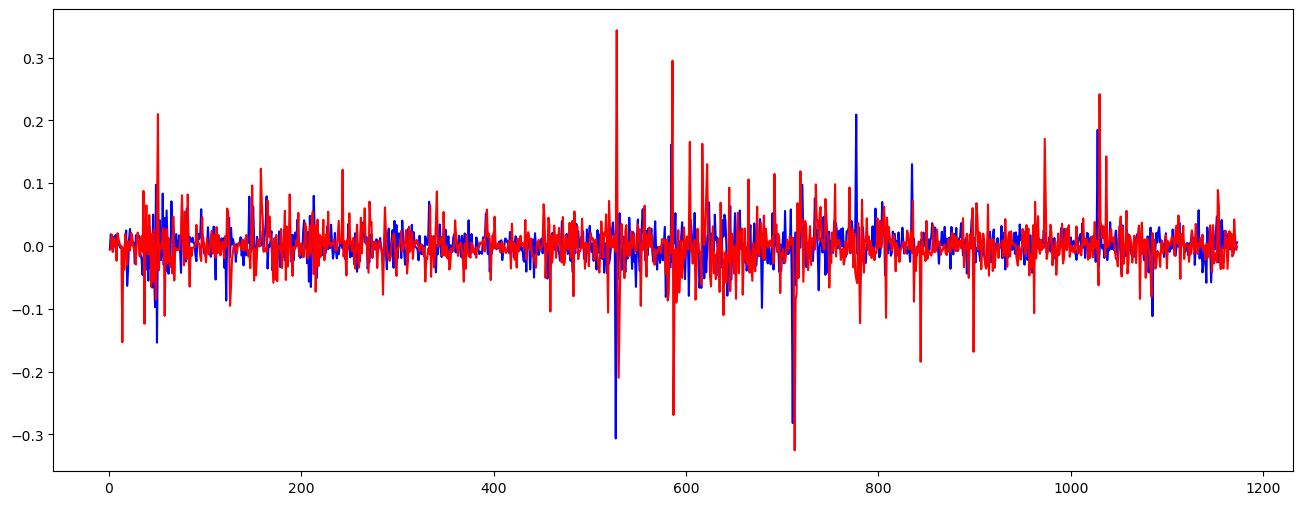

In [30]:
import numpy as np
import pandas as pd
import scipy.special as ss
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import random
 
random.seed(10)
 
def garch(param, *args):
    # Initialize Params
    mu = param[0]
    omega = param[1]
    alpha = param[2]
    beta = param[3]
    nv = param[4]
    GARCH_Dens, sigma2, F, v = {}, {}, {}, {} 
    # intialize values 
    sigma2[0] = np.var(Y)
    Likelihood = 0
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        if sigma2[t]<0: sigma2[t] = 1e-2
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.standard_t(nv,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = np.log(ss.gamma((nv+1)/2))-np.log(np.sqrt(nv*np.pi))-\
                        np.log(ss.gamma(nv/2))-((nv+1)/2)*np.log(1+((F[t]**2)/v[t])/nv)       
        Likelihood += GARCH_Dens[t]  
    return Likelihood
 
def garch_path(params, *args):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    nv = params[4]
    sigma2, path = {}, {}
    # initialzie volatility and path
    sigma2[0] = np.var(Y)
    path[0] = np.array([Y[0]])
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        if sigma2[t]<0: sigma2[t] = 1e-2
        path[t] = mu+np.sqrt(sigma2[t])*np.random.standard_t(nv,1)  
    return path, sigma2    
 
start_date = datetime(2020,1,1)
end_date = datetime(2024,8,31)
stock_symbol = 'META'
stock = yf.download(stock_symbol,start_date ,end_date)
Y = np.diff(np.log(stock['Adj Close'].values))
T = Y.shape[0]
param0 = np.array([np.mean(Y), np.var(Y)/2500, 1.2, 0.25,  10])
results = minimize(garch, param0, method='BFGS', tol=1e-2, options={'disp': True})
param_star = results.x
 
path, vol = garch_path(param_star, Y, T)
Y_GARCH = path.values()
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r')
GARCH_prediction = list(Y_GARCH)
 
# Calculate RMSE
RMSE = np.sqrt(np.mean((np.array(GARCH_prediction ) - np.array(Y))**2))
print(f'RMSE value is: {RMSE}')